<a href="https://colab.research.google.com/github/nestratovaam/lab_2_semestr/blob/main/lab6_Nestratova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовый набор данных

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

seed(1)
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))

mean=50.303 stdv=4.426


## Визуальные проверки нормальности

### График гистограммы

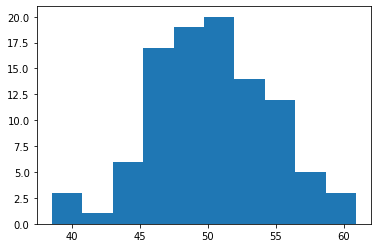

In [ ]:
from matplotlib import pyplot

pyplot.hist(data)
pyplot.show()

При выполнении примера создается график гистограммы, показывающий
количество наблюдений в каждом бине. Мы можем видеть гауссовидную форму данных,
которая, хотя и не сильно знакома в форме колокола, является грубым приближением.

### Квантиль-Квантиль Участок

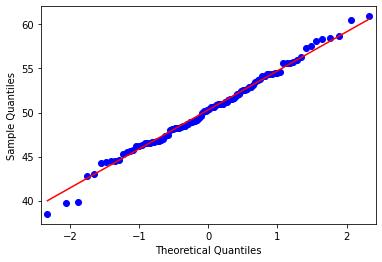

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data, line='s')
pyplot.show()

При выполнении примера создается график QQ, показывающий график рассеяния
точек в диагональной линии, который точно соответствует ожидаемому диагональному
шаблону для выборки из распределения Гаусса.
Есть несколько небольших отклонений, особенно в нижней части графика, что и
следовало ожидать, учитывая небольшую выборку данных.

## Статистические тесты нормальности

### Тест Шапиро-Вилка

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


При выполнении примера сначала вычисляется тест для выборки данных, затем
выводится статистика и вычисленное значение p.
Значение p интересует и находит, что данные, скорее всего, взяты из гауссовского
распределения.

### Тест д'Агостино на K ^ 2

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


При выполнении примера вычисляется статистика и печатается статистика и
значение p. Значение p интерпретируется по отношению к альфа 5% и обнаруживает, что
тестовый набор данных не отличается значительно от нормального.

### Тест Андерсона-Дарлинга

In [ ]:
from scipy.stats import anderson

result = anderson(data)
print('Statistics=%.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[1], result.critical_values[1]
  if result.statistic < result.critical_values[1]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data doestn look normal (reject H0)' % (sl, cv))

Statistics=0.220
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)


При выполнении примера вычисляется статистика по набору тестовых данных и
выводятся критические значения.
Критические значения в статистическом тесте - это диапазон предварительно
определенных границ значимости, при которых H0 может быть отклонен, если расчетная
статистика меньше критического значения. Вместо простого значения p тест возвращает
критическое значение для диапазона различных обычно используемых уровней
значимости.
Существует возможность интерпретировать результаты, не сумев отвергнуть
нулевую гипотезу о том, что данные являются нормальными, если рассчитанная статистика
теста меньше критического значения на выбранном уровне значимости.
На каждом уровне значимости тест обнаружил, что данные соответствуют нормальному
распределению

# **Индивидуальное задание**

**Вариант 21.**  использование данных с веб-страницы,
обеспечивающей информацией о самых кассовых фильмах по жанру спортивные фильмы.



In [11]:
from numpy import mean
from numpy import std

#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_sports_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[3]
df

,Film,Year,Worldwide gross,Ref,Sport(s)
0,Furious 7,2015,"$1,516,045,911",[1],Motor racing
1,The Fate of the Furious,2017,"$1,238,764,765",[2],Motor racing
2,The Hunger Games: Catching Fire,2013,"$865,011,746",[3],Battle royale
3,Fast & Furious 6,2013,"$788,679,850",[4],Motor racing
4,The Hunger Games: Mockingjay – Part 1,2014,"$755,356,711",[5],Battle royale
5,The Hunger Games,2012,"$694,394,724",[6],Battle royale
6,Forrest Gump,1994,"$678,222,284",[7],American football / ping pong
7,The Hunger Games: Mockingjay – Part 2,2015,"$653,428,261",[8],Battle royale
8,Fast Five,2011,"$626,137,675",[9],Motor racing
9,Casino Royale,2006,"$616,501,619",[10],Gambling


In [12]:
df['Worldwide gross']=df['Worldwide gross'].str.replace(r"$", "").str.replace(r",","")
df['Worldwide gross']= df['Worldwide gross'].astype('int64')
df.drop('Ref', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             50 non-null     object
 1   Year             50 non-null     int64 
 2   Worldwide gross  50 non-null     int64 
 3   Sport(s)         50 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [13]:
df

,Film,Year,Worldwide gross,Sport(s)
0,Furious 7,2015,1516045911,Motor racing
1,The Fate of the Furious,2017,1238764765,Motor racing
2,The Hunger Games: Catching Fire,2013,865011746,Battle royale
3,Fast & Furious 6,2013,788679850,Motor racing
4,The Hunger Games: Mockingjay – Part 1,2014,755356711,Battle royale
5,The Hunger Games,2012,694394724,Battle royale
6,Forrest Gump,1994,678222284,American football / ping pong
7,The Hunger Games: Mockingjay – Part 2,2015,653428261,Battle royale
8,Fast Five,2011,626137675,Motor racing
9,Casino Royale,2006,616501619,Gambling


In [14]:
data = df['Worldwide gross']
print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))

mean=393248240.380 stdv=275488096.614


## Визуальные проверки нормальности

### График гистограммы

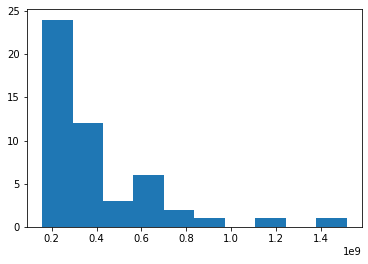

In [15]:
from matplotlib import pyplot

pyplot.hist(data)
pyplot.show()

При выполнении примера создается график гистограммы, показывающий
количество наблюдений в каждом бине. Мы можем видеть гауссовидную форму данных,
которая, хотя и не сильно знакома в форме колокола, является грубым приближением.

### Квантиль-Квантиль Участок

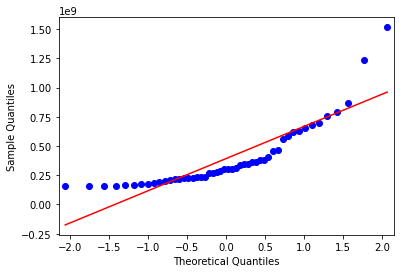

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data, line='s')
pyplot.show()

При выполнении примера создается график QQ, показывающий график рассеяния
точек в диагональной линии, который точно соответствует ожидаемому диагональному
шаблону для выборки из распределения Гаусса.
Есть несколько небольших отклонений, особенно в нижней части графика, что и
следовало ожидать, учитывая небольшую выборку данных.

## Статистические тесты нормальности

### Тест Шапиро-Вилка

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.765, p=0.000
Sample doesnt look Gaussian (regect H0)


При выполнении примера сначала вычисляется тест для выборки данных, затем
выводится статистика и вычисленное значение p.
Значение p интересует и находит, что данные, скорее всего, взяты из гауссовского
распределения.

### Тест д'Агостино на K ^ 2

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=35.403, p=0.000
Sample doesnt look Gaussian (regect H0)


При выполнении примера вычисляется статистика и печатается статистика и
значение p. Значение p интерпретируется по отношению к альфа 5% и обнаруживает, что
тестовый набор данных не отличается значительно от нормального.

### Тест Андерсона-Дарлинга

In [ ]:
from scipy.stats import anderson

result = anderson(data)
print('Statistics=%.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[1], result.critical_values[1]
  if result.statistic < result.critical_values[1]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data doestn look normal (reject H0)' % (sl, cv))

Statistics=3.436
10.000: 0.613, data doestn look normal (reject H0)
10.000: 0.613, data doestn look normal (reject H0)
10.000: 0.613, data doestn look normal (reject H0)
10.000: 0.613, data doestn look normal (reject H0)
10.000: 0.613, data doestn look normal (reject H0)


При выполнении примера вычисляется статистика по набору тестовых данных и
выводятся критические значения.
Критические значения в статистическом тесте - это диапазон предварительно
определенных границ значимости, при которых H0 может быть отклонен, если расчетная
статистика меньше критического значения. Вместо простого значения p тест возвращает
критическое значение для диапазона различных обычно используемых уровней
значимости.
Существует возможность интерпретировать результаты, не сумев отвергнуть
нулевую гипотезу о том, что данные являются нормальными, если рассчитанная статистика
теста меньше критического значения на выбранном уровне значимости.
На каждом уровне значимости тест обнаружил, что данные соответствуют нормальному
распределению

## Итог:

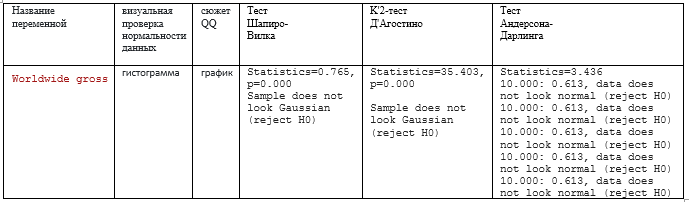